In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [3]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True
)

print(zip_path)
csv_path, _ = os.path.splitext(zip_path)
print(csv_path)

13574144/13568290 [==============================] - 0s 0us/step
/root/.keras/datasets/jena_climate_2009_2016.csv.zip
/root/.keras/datasets/jena_climate_2009_2016.csv


In [4]:
df = pd.read_csv(csv_path)
df = df[5::6]

df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [5]:
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [6]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [7]:
date_time.head()

5    2009-01-01 01:00:00
11   2009-01-01 02:00:00
17   2009-01-01 03:00:00
23   2009-01-01 04:00:00
29   2009-01-01 05:00:00
Name: Date Time, dtype: datetime64[ns]

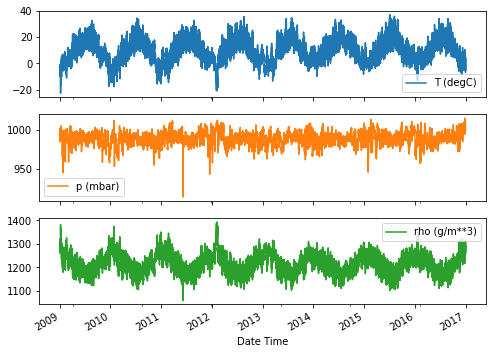

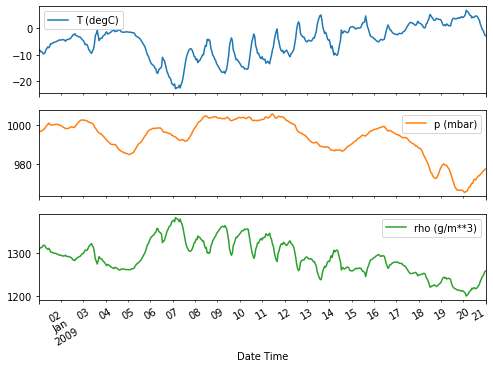

In [8]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


In [10]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

print(df['wv (m/s)'].min())
print(df['max. wv (m/s)'].min())

0.0
0.0


Text(0, 0.5, 'Wind velocity [m/s]')

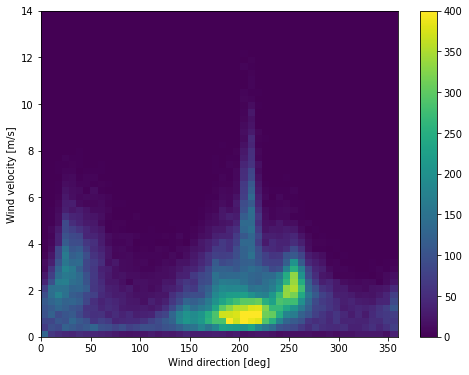

In [11]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind direction [deg]')
plt.ylabel('Wind velocity [m/s]')

In [12]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

wd_rad = df.pop('wd (deg)') * np.pi / 180

df['Wx'] = wv * np.cos(wd_rad)
df['Wy'] = wv * np.sin(wd_rad)

df['max Wx'] = max_wv * np.cos(wd_rad)
df['max Wy'] = max_wv * np.sin(wd_rad)

(-11.305513973134667, 8.24469928549079, -8.27438540335515, 7.7338312955467785)

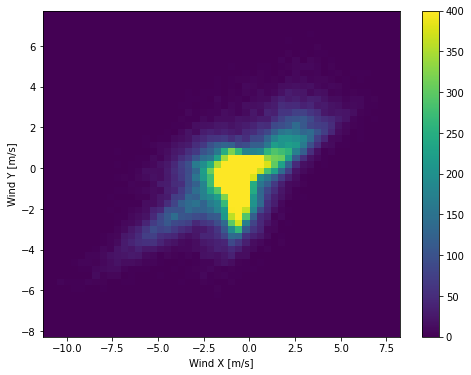

In [13]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [14]:
timestamp_s = date_time.map(datetime.datetime.timestamp)

In [15]:
day = 24*60*60
year = 365.2425*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

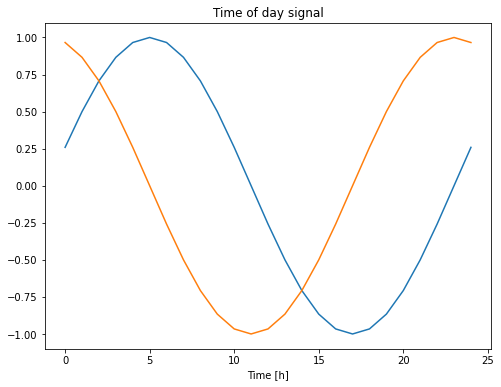

In [16]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

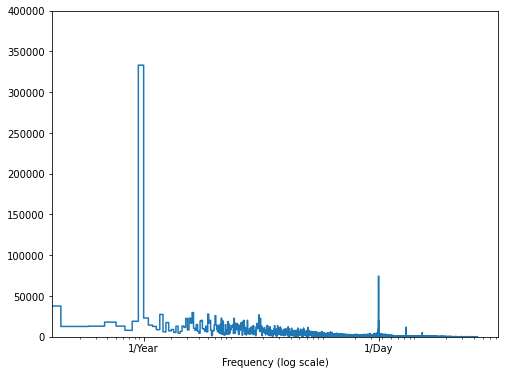

In [17]:
fft = tf.signal.rfft(df['T (degC)'])
f_per_dataset = np.arange(len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h / hours_per_year

f_per_year = f_per_dataset / years_per_dataset

plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/Day'])
_ = plt.xlabel('Frequency (log scale)')

In [18]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[:int(0.7*n)]
val_df = df[int(0.7*n):int(0.9*n)]
test_df = df[int(0.9*n):]

num_features = df.shape[1]

In [19]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

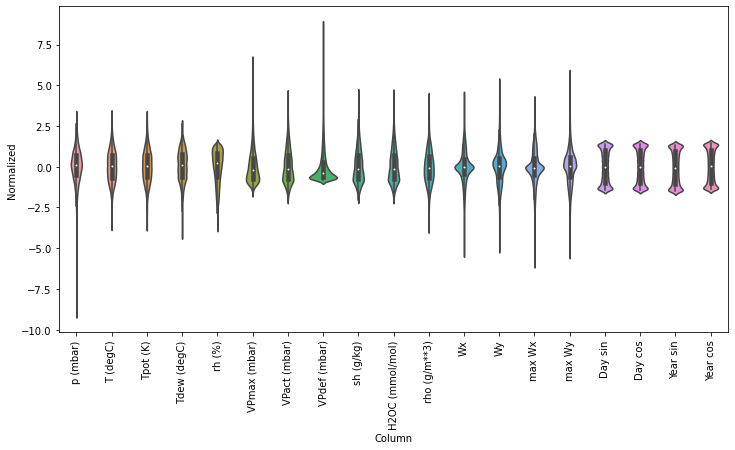

In [20]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [21]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=None):
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input slice: {self.input_slice}',
            f'Input indices: {self.input_indices}',
            f'Label slice: {self.labels_slice}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'
        ])

In [22]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24, label_columns=['T (degC)'])
w1

Total window size: 48
Input slice: slice(0, 24, None)
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label slice: slice(47, None, None)
Label indices: [47]
Label column name(s): ['T (degC)']

In [23]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1, label_columns=['T (degC)'])
w2

Total window size: 7
Input slice: slice(0, 6, None)
Input indices: [0 1 2 3 4 5]
Label slice: slice(6, None, None)
Label indices: [6]
Label column name(s): ['T (degC)']

In [24]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]

    if self.label_columns is not None:
        labels = tf.stack([labels[:, :, self.column_indices[name]] for name in self.label_columns], axis=-1)

    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

In [25]:
example_window = tf.stack([
    np.array(train_df[:w2.total_window_size]),
    np.array(train_df[100:100+w2.total_window_size]),
    np.array(train_df[200:200+w2.total_window_size]),
])

example_inputs, example_labels = w2.split_window(example_window)
print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 19)
Inputs shape: (3, 6, 19)
Labels shape: (3, 1, 1)


In [26]:
w2.example = example_inputs, example_labels

In [27]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
    inputs, labels = self.example

    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col}[normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index], label='inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index
        
        if label_col_index is None:
            continue
        
        plt.scatter(self.label_indices, labels[n, :, label_col_index], edgecolors='k', label='Labels', c='#2ca02c', s=64)

        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index], marker='X', edgecolors='k', label='Predictions', c='#ff7f0e', s=64)
        
        if n == 0:
            plt.legend()
        
    plt.xlabel('Time [h]')

WindowGenerator.plot = plot

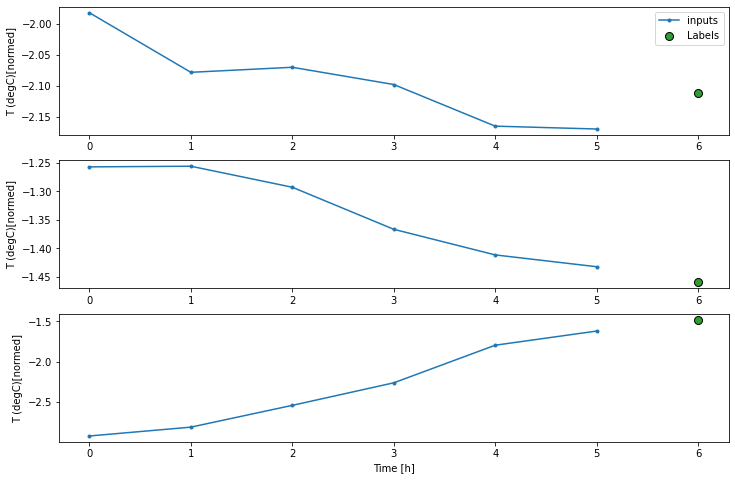

In [28]:
w2.plot()

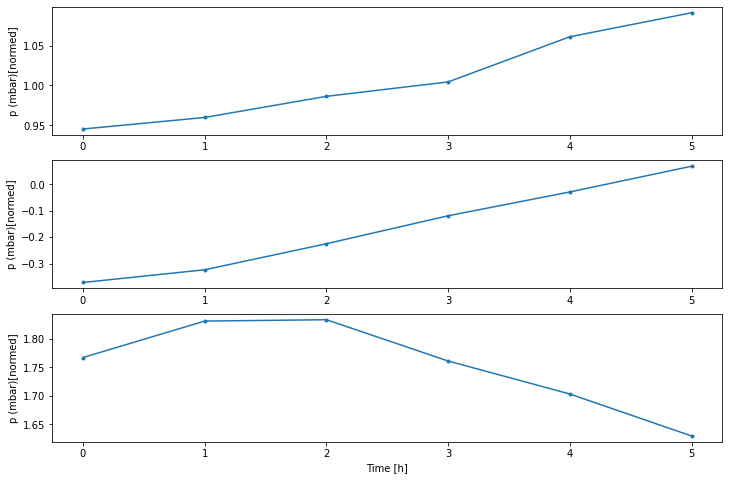

In [29]:
w2.plot(plot_col='p (mbar)')

In [30]:
def make_dataset(self, data):
    data = np.array(data, dtype='float32')
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(data=data, targets=None, sequence_length=self.total_window_size, sequence_stride=1, shuffle=True, batch_size=32)

    ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

In [31]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    result = getattr(self, '_example', None)
    if result is None:
        result = next(iter(self.train))
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [32]:
w2.train.element_spec

(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [33]:
for example_inputs, example_labels in w2.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 1, 1)


In [34]:
single_step_window = WindowGenerator(input_width=1, label_width=1, shift=1, label_columns=['T (degC)'])
single_step_window

Total window size: 2
Input slice: slice(0, 1, None)
Input indices: [0]
Label slice: slice(1, None, None)
Label indices: [1]
Label column name(s): ['T (degC)']

In [35]:
for example_inputs, example_labels in single_step_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 19)
Labels shape (batch, time, features): (32, 1, 1)


In [36]:
class BaseLine(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
    
    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [37]:
baseline = BaseLine(label_index=column_indices['T (degC)'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}

val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test)

220/220 [==============================] - 1s 3ms/step - loss: 0.0142 - mean_absolute_error: 0.0852


In [38]:
wide_window = WindowGenerator(input_width=24, label_width=24, shift=1, label_columns=['T (degC)'])
wide_window

Total window size: 25
Input slice: slice(0, 24, None)
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label slice: slice(1, None, None)
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T (degC)']

In [39]:
print('Input shape: ', wide_window.example[0].shape)
print('Output shape: ', baseline(wide_window.example[0]).shape)

Input shape:  (32, 24, 19)
Output shape:  (32, 24, 1)


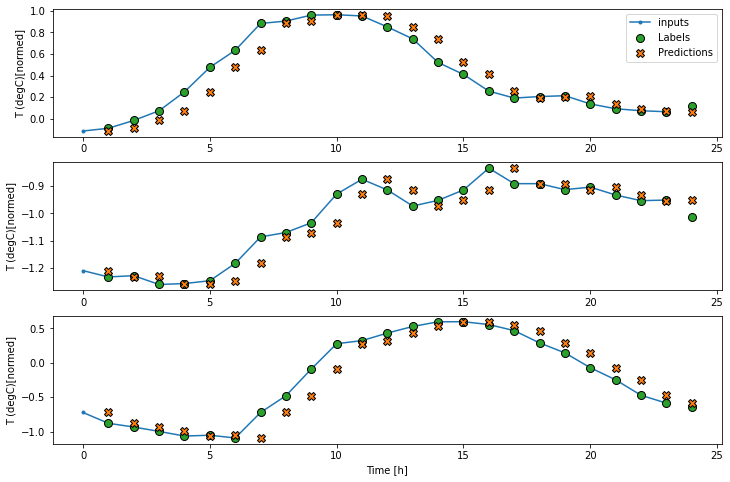

In [40]:
wide_window.plot(baseline)

In [41]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [42]:
print('Input shape: ', single_step_window.example[0].shape)
print('Output shape: ', linear(single_step_window.example[0]).shape)

Input shape:  (32, 1, 19)
Output shape:  (32, 1, 1)


In [43]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min')
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    history = model.fit(window.train, epochs=MAX_EPOCHS, validation_data=window.val, callbacks=[early_stopping])
    return history

In [44]:
history = compile_and_fit(model=linear, window=single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test)

Epoch 1/20
1534/1534 [==============================] - 6s 3ms/step - loss: 0.0945 - mae: 0.1886 - val_loss: 0.0156 - val_mae: 0.0940
Epoch 2/20
1534/1534 [==============================] - 6s 4ms/step - loss: 0.0125 - mae: 0.0840 - val_loss: 0.0106 - val_mae: 0.0777
Epoch 3/20
1534/1534 [==============================] - 6s 4ms/step - loss: 0.0099 - mae: 0.0735 - val_loss: 0.0091 - val_mae: 0.0706
Epoch 4/20
1534/1534 [==============================] - 6s 4ms/step - loss: 0.0093 - mae: 0.0706 - val_loss: 0.0087 - val_mae: 0.0692
Epoch 5/20
1534/1534 [==============================] - 5s 3ms/step - loss: 0.0092 - mae: 0.0702 - val_loss: 0.0087 - val_mae: 0.0685
Epoch 6/20
1534/1534 [==============================] - 6s 4ms/step - loss: 0.0091 - mae: 0.0700 - val_loss: 0.0086 - val_mae: 0.0688
Epoch 7/20
1534/1534 [==============================] - 5s 3ms/step - loss: 0.0091 - mae: 0.0699 - val_loss: 0.0087 - val_mae: 0.0688
Epoch 8/20
220/220 [==============================] - 1s 3ms/s

In [45]:
print('Input shape: ', wide_window.example[0].shape)
print('BaseLine Output shape: ', baseline(wide_window.example[0]).shape)
print('Linear Output shape: ', linear(wide_window.example[0]).shape)

Input shape:  (32, 24, 19)
BaseLine Output shape:  (32, 24, 1)
Linear Output shape:  (32, 24, 1)


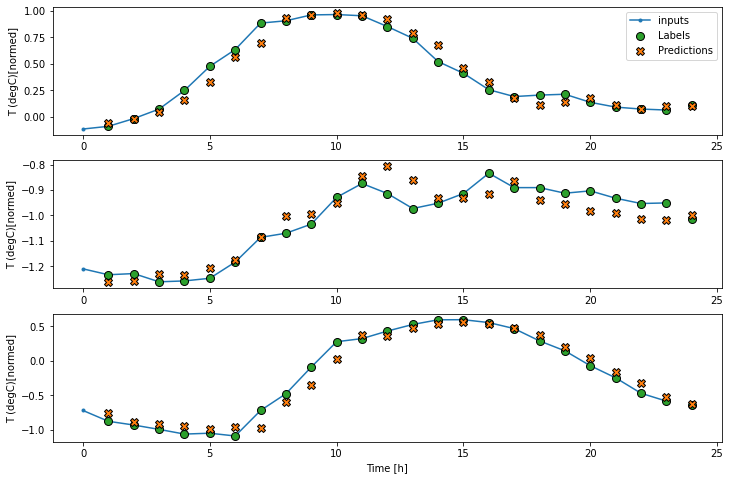

In [46]:
wide_window.plot(linear)

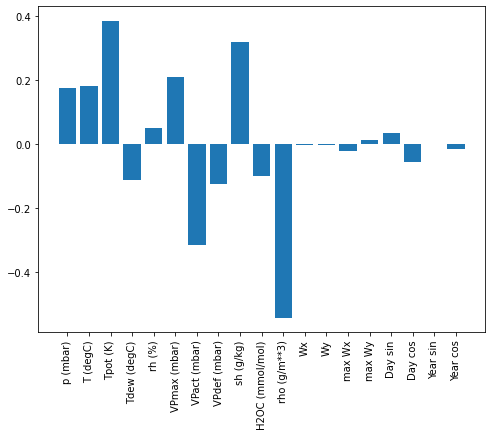

In [47]:
plt.bar(x = range(len(train_df.columns)), height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [48]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test)

Epoch 1/20
1534/1534 [==============================] - 7s 4ms/step - loss: 0.0148 - mae: 0.0787 - val_loss: 0.0088 - val_mae: 0.0710
Epoch 2/20
1534/1534 [==============================] - 7s 5ms/step - loss: 0.0077 - mae: 0.0635 - val_loss: 0.0085 - val_mae: 0.0667
Epoch 3/20
1534/1534 [==============================] - 6s 4ms/step - loss: 0.0074 - mae: 0.0618 - val_loss: 0.0070 - val_mae: 0.0599
Epoch 4/20
1534/1534 [==============================] - 6s 4ms/step - loss: 0.0071 - mae: 0.0606 - val_loss: 0.0092 - val_mae: 0.0701
Epoch 5/20
1534/1534 [==============================] - 6s 4ms/step - loss: 0.0070 - mae: 0.0594 - val_loss: 0.0068 - val_mae: 0.0595
Epoch 6/20
1534/1534 [==============================] - 6s 4ms/step - loss: 0.0068 - mae: 0.0588 - val_loss: 0.0068 - val_mae: 0.0585
Epoch 7/20
1534/1534 [==============================] - 6s 4ms/step - loss: 0.0067 - mae: 0.0581 - val_loss: 0.0068 - val_mae: 0.0588
Epoch 8/20
1534/1534 [==============================] - 7s 5ms

In [49]:
CONV_WIDTH = 3

conv_window = WindowGenerator(input_width=CONV_WIDTH, label_width=1, shift=1, label_columns=['T (degC)'])
conv_window

Total window size: 4
Input slice: slice(0, 3, None)
Input indices: [0 1 2]
Label slice: slice(3, None, None)
Label indices: [3]
Label column name(s): ['T (degC)']

Text(0.5, 1.0, 'Given 3h as input, predict 1h into the future.')

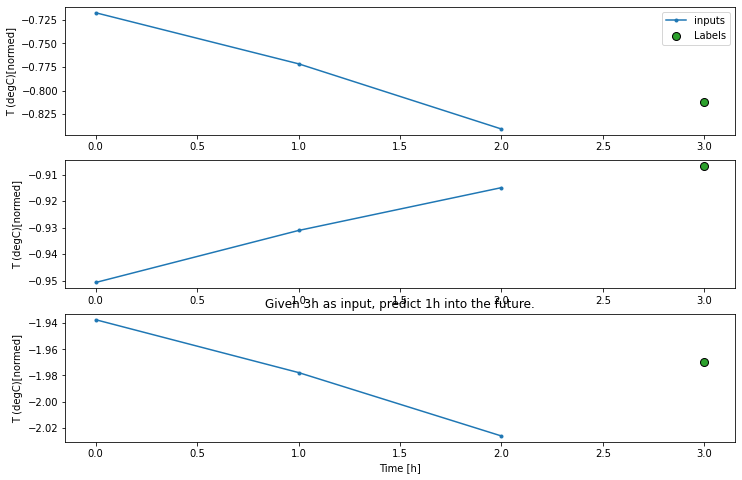

In [50]:
conv_window.plot()
plt.title('Given 3h as input, predict 1h into the future.')

In [51]:
multi_step_dense = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Reshape([1, -1])
])

In [52]:
print('Conv window shape: ', conv_window.example[0].shape)
print('Output shape: ', multi_step_dense(conv_window.example[0]).shape)

Conv window shape:  (32, 3, 19)
Output shape:  (32, 1, 1)


In [53]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test)

219/219 [==============================] - 1s 3ms/step - loss: 0.0062 - mae: 0.0564


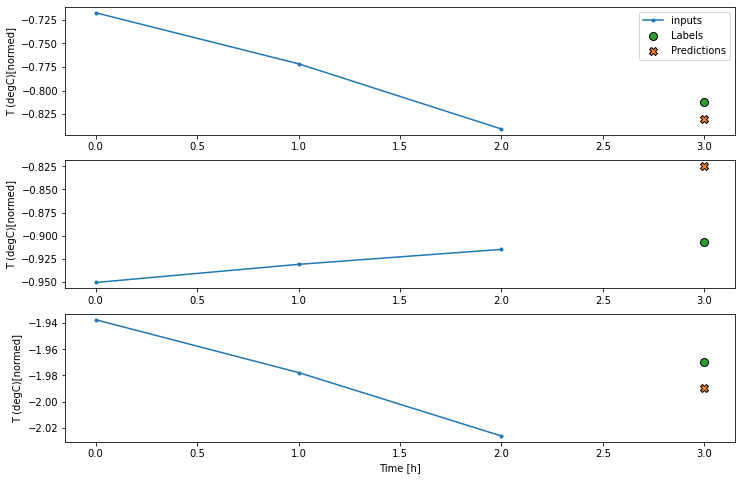

In [54]:
conv_window.plot(multi_step_dense)

In [55]:
print('Input shape:', wide_window.example[0].shape)
try:
    print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
    print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 19)

ValueError:Input 0 of layer dense_4 is incompatible with the layer: expected axis -1 of input shape to have value 57 but received input with shape (32, 456)


In [56]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=(CONV_WIDTH, ), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [57]:
print('Conv model on conv_window')
print('Input shape: ', conv_window.example[0].shape)
print('Output shape: ', conv_model(conv_window.example[0]).shape)

Conv model on conv_window
Input shape:  (32, 3, 19)
Output shape:  (32, 1, 1)


In [58]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test)

219/219 [==============================] - 1s 3ms/step - loss: 0.0086 - mae: 0.0690


In [59]:
print('Wide window')
print('Input shape: ', wide_window.example[0].shape)
print('Label shape: ', wide_window.example[1].shape)
print('Output shape: ', conv_model(wide_window.example[0]).shape)

Wide window
Input shape:  (32, 24, 19)
Label shape:  (32, 24, 1)
Output shape:  (32, 22, 1)


In [60]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)

wide_conv_window = WindowGenerator(input_width=INPUT_WIDTH, label_width=LABEL_WIDTH, shift=1, label_columns=['T (degC)'])
wide_conv_window

Total window size: 27
Input slice: slice(0, 26, None)
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label slice: slice(3, None, None)
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['T (degC)']

In [61]:
print('Wide conv window')
print('Input shape: ', wide_conv_window.example[0].shape)
print('Label shape: ', wide_conv_window.example[1].shape)
print('Output shape: ', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape:  (32, 26, 19)
Label shape:  (32, 24, 1)
Output shape:  (32, 24, 1)


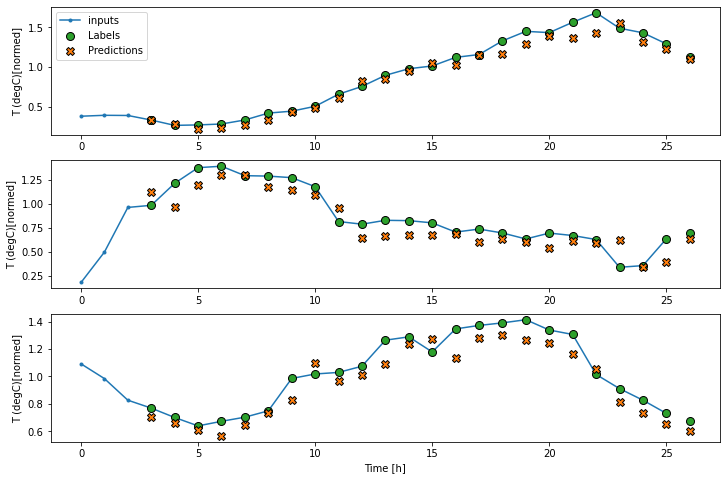

In [62]:
wide_conv_window.plot(conv_model)

In [63]:
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(1)
])

In [64]:
print('Input shape: ', wide_window.example[0].shape)
print('Output shape: ', lstm_model(wide_window.example[0]).shape)

Input shape:  (32, 24, 19)
Output shape:  (32, 24, 1)


In [65]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test)

219/219 [==============================] - 1s 4ms/step - loss: 0.0056 - mae: 0.0520


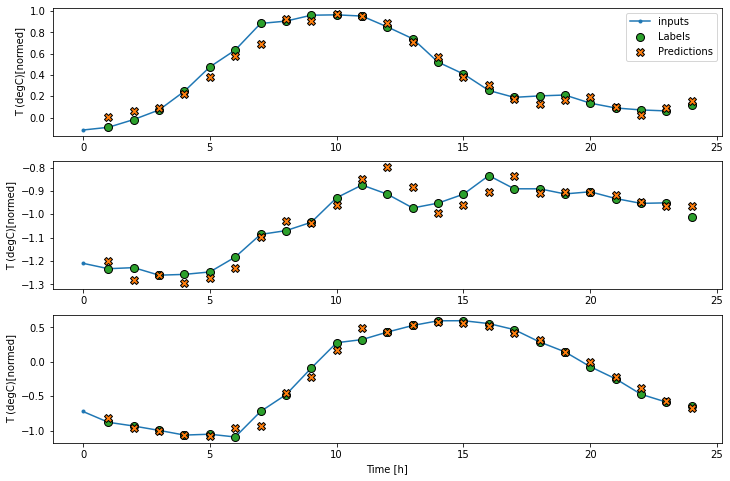

In [66]:
wide_window.plot(lstm_model)

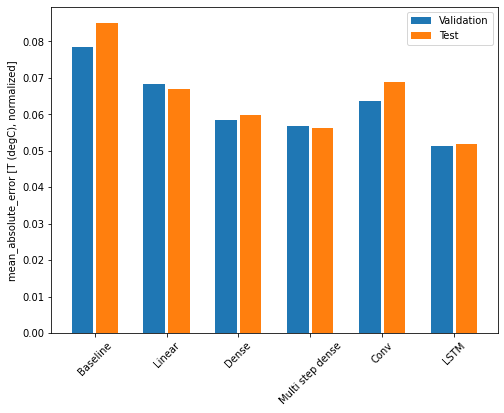

In [67]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mae'
metric_index = lstm_model.metrics_names.index('mae')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(), rotation=45)
_ = plt.legend()

In [68]:
for name, value in performance.items():
    print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0852
Linear      : 0.0670
Dense       : 0.0597
Multi step dense: 0.0564
Conv        : 0.0690
LSTM        : 0.0520


In [70]:
single_step_window = WindowGenerator(input_width=1, label_width=1, shift=1)
wide_window = WindowGenerator(input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 19)
Labels shape (batch, time, features): (32, 24, 19)


In [71]:
baseline = BaseLine()
baseline.compile(loss='mse', metrics=['mae'])

In [72]:
val_performance = {}
performance = {}

val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test)

219/219 [==============================] - 1s 2ms/step - loss: 0.0903 - mae: 0.1638


In [73]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [74]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test)

220/220 [==============================] - 1s 3ms/step - loss: 0.0677 - mae: 0.1287


In [75]:
%%time
wide_window = WindowGenerator(input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)
IPython.display.clear_output()

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test)
print()

219/219 [==============================] - 1s 4ms/step - loss: 0.0622 - mae: 0.1224

CPU times: user 4min 27s, sys: 31.4 s, total: 4min 58s
Wall time: 3min 13s


In [76]:
class ResidualWrapper(tf.keras.Model):
    def __init__(self, model):
        super().__init__()
        self.model = model
    
    def call(self, inputs, *args, **kwargs):
        delta = self.model(inputs, *args, **kwargs)

        return inputs + delta

In [77]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
        tf.keras.layers.LSTM(units=32, return_sequences=True),
        tf.keras.layers.Dense(units=num_features, kernel_initializer=tf.initializers.zeros())
    ])
)

history = compile_and_fit(residual_lstm, wide_window)
IPython.display.clear_output()

val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test)
print()

219/219 [==============================] - 1s 4ms/step - loss: 0.0618 - mae: 0.1192

CPU times: user 2min 36s, sys: 17.9 s, total: 2min 54s
Wall time: 1min 50s


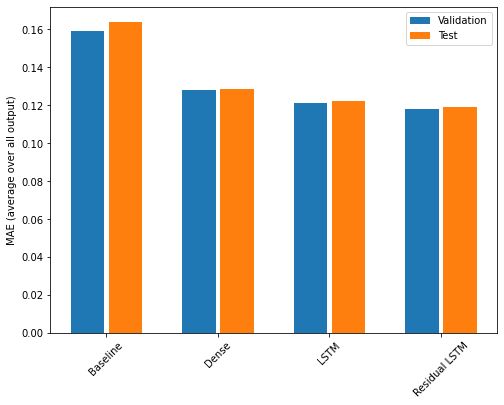

In [78]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mae'
metric_index = lstm_model.metrics_names.index('mae')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width=width, label='Validation')
plt.bar(x + 0.17, test_mae, width=width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(), rotation=45)
plt.ylabel('MAE (average over all output)')
_ = plt.legend()

In [79]:
for name, value in performance.items():
    print(f'{name:15s}:{value[1]:0.4f}')

Baseline       :0.1638
Dense          :0.1287
LSTM           :0.1224
Residual LSTM  :0.1192


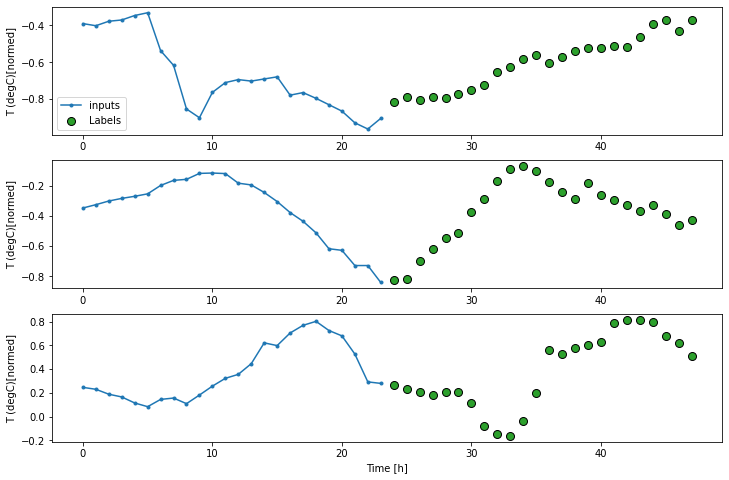

In [81]:
OUT_STEPS = 24

multi_window = WindowGenerator(input_width=24, label_width=OUT_STEPS, shift=OUT_STEPS)
multi_window
multi_window.plot()

218/218 [==============================] - 1s 4ms/step - loss: 0.6583 - mae: 0.5157


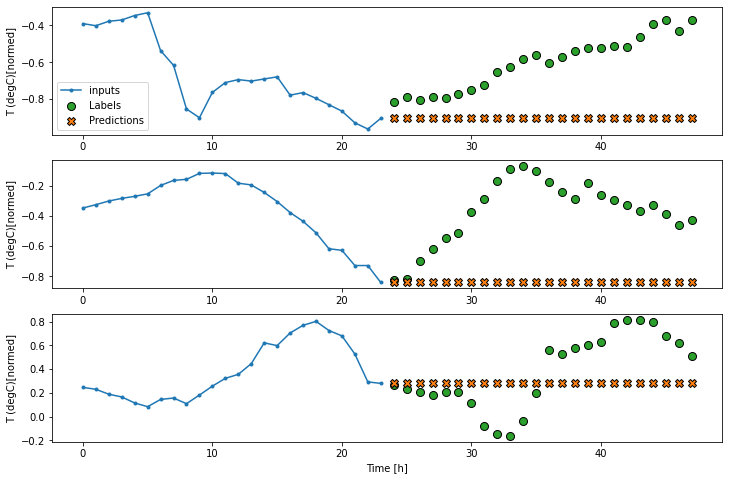

In [83]:
class MultiStepLastBaseline(tf.keras.Model):
    def call(self, inputs):
        return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss='mse', metrics=['mae'])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test)
multi_window.plot(last_baseline)

218/218 [==============================] - 1s 3ms/step - loss: 0.3831 - mae: 0.3774


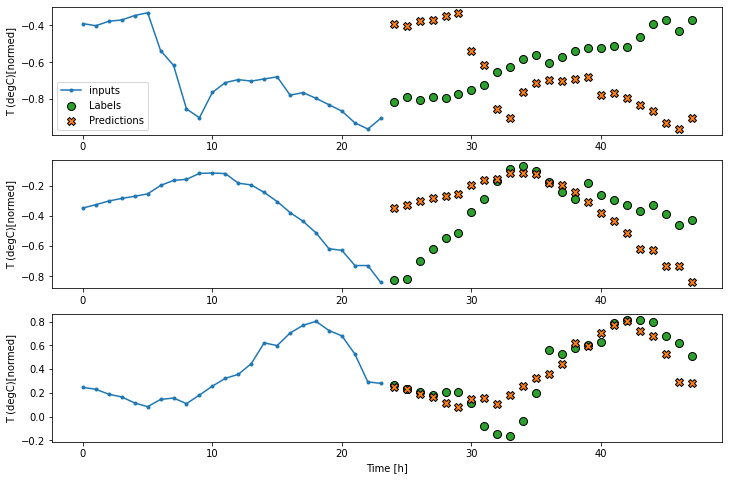

In [84]:
class RepeatBaseline(tf.keras.Model):
    def call(self, inputs):
        return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss='mse', metrics=['mae'])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test)
multi_window.plot(repeat_baseline)

218/218 [==============================] - 1s 3ms/step - loss: 0.2447 - mae: 0.2981


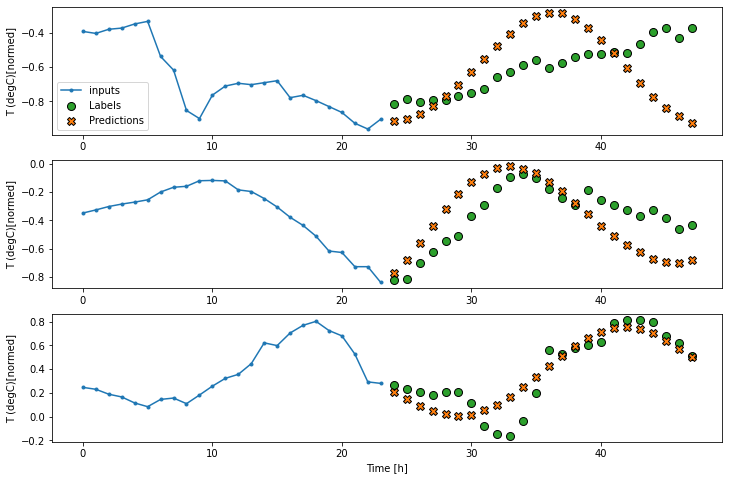

In [85]:
multi_linear_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    tf.keras.layers.Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)
IPython.display.clear_output()

multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test)

multi_window.plot(multi_linear_model)

218/218 [==============================] - 1s 4ms/step - loss: 0.2121 - mae: 0.2772


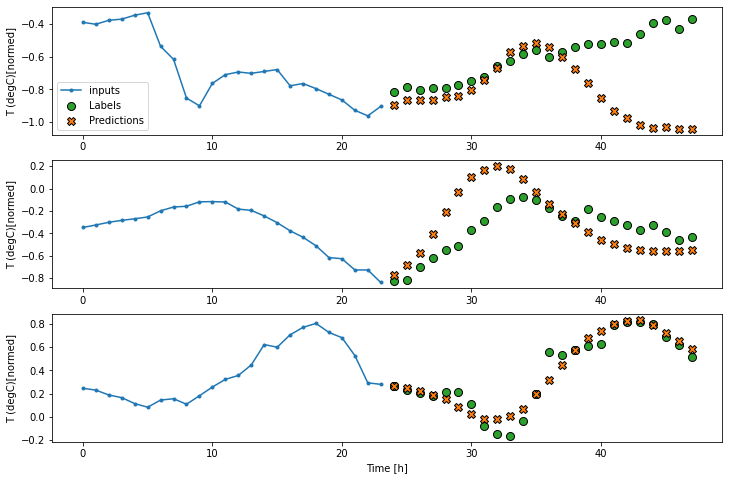

In [86]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)
IPython.display.clear_output()

multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test)

multi_window.plot(multi_dense_model)

218/218 [==============================] - 1s 3ms/step - loss: 0.2068 - mae: 0.2824


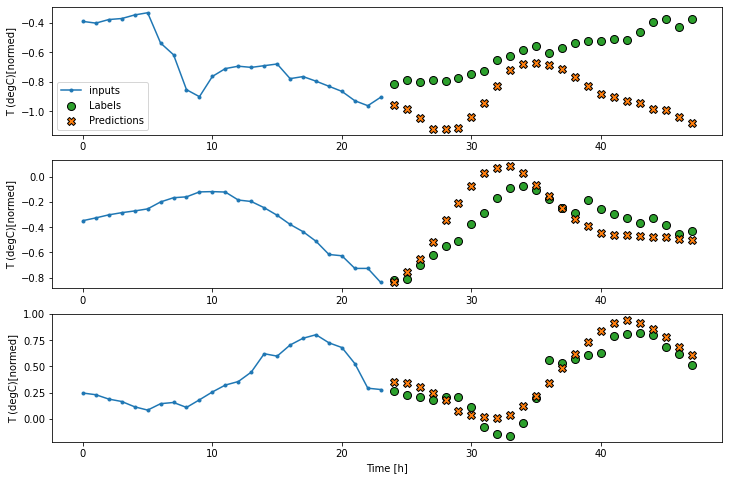

In [88]:
CONV_WIDTH = 3

multi_conv_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    tf.keras.layers.Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)
IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test)

multi_window.plot(multi_conv_model)

218/218 [==============================] - 1s 5ms/step - loss: 0.1988 - mae: 0.2746


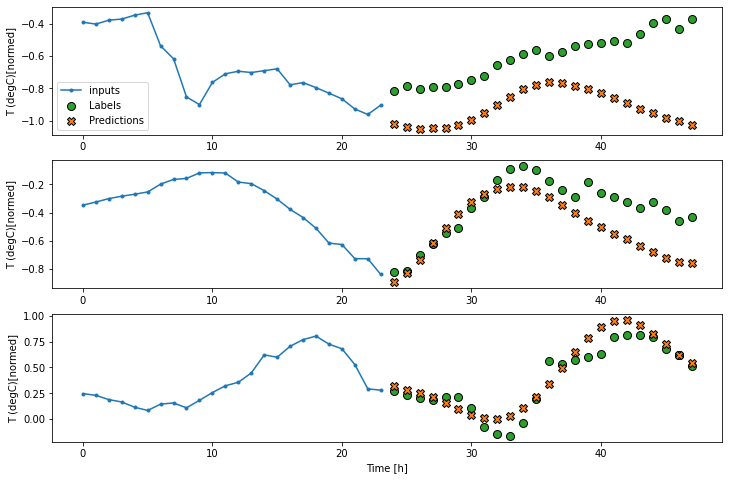

In [90]:
multi_lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)
IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test)

multi_window.plot(multi_lstm_model)

In [91]:
class FeedBack(tf.keras.Model):
    def __init__(self, units, out_steps):
        super().__init__()
        self.units = units
        self.out_steps = out_steps
        self.lstm_cell = tf.keras.layers.LSTMCell(units)
        self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
        self.dense = tf.keras.layers.Dense(num_features)

In [92]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [93]:
def warm_up(self, inputs):
    x, *state = self.lstm_rnn(inputs)
    prediction = self.dense(x)
    
    return prediction, state

FeedBack.warm_up = warm_up

In [94]:
prediction, state = feedback_model.warm_up(multi_window.example[0])
prediction.shape

TensorShape([32, 19])

In [97]:
def call(self, inputs, training=None):
    predictions = []
    prediction, state = self.warm_up(inputs)

    predictions.append(prediction)
    
    for n in range(1, self.out_steps):
        x = prediction

        x, state = self.lstm_cell(x, states=state, training=training)

        prediction = self.dense(x)

        predictions.append(prediction)
    
    predictions = tf.stack(predictions)
    predictions = tf.transpose(predictions, [1, 0, 2])

    return predictions

FeedBack.call = call

In [98]:
print('Output shape (batch, time, feature): {}'.format(feedback_model(multi_window.example[0]).shape))

Output shape (batch, time, feature): (32, 24, 19)


218/218 [==============================] - 1s 6ms/step - loss: 0.2131 - mae: 0.2943


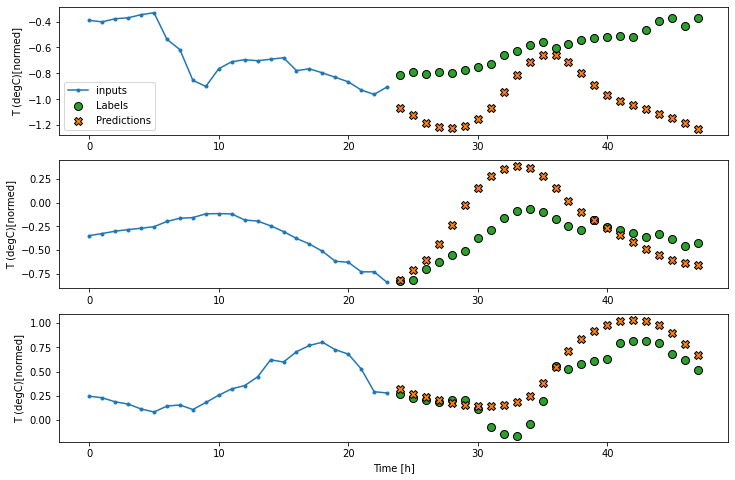

In [99]:
history = compile_and_fit(feedback_model, multi_window)
IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test)

multi_window.plot(feedback_model)

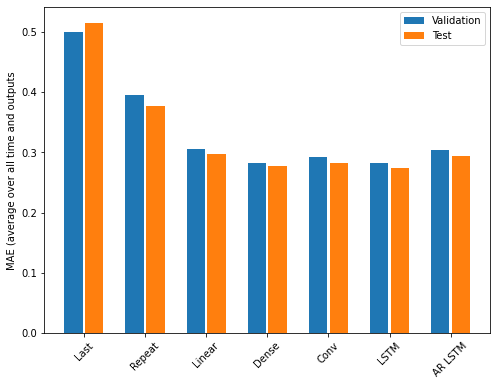

In [100]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mae'
metric_index = lstm_model.metrics_names.index('mae')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(), rotation=45)
plt.ylabel(f'MAE (average over all time and outputs')
_ = plt.legend()

In [101]:
for name, value in multi_performance.items():
    print(f'{name:8s}: {value[1]:0.4f}')

Last    :0.5157
Repeat  :0.3774
Linear  :0.2981
Dense   :0.2772
Conv    :0.2824
LSTM    :0.2746
AR LSTM :0.2943
